# **PRÁCTICA 1 - Parte 2: Transfer learning**
### Universitat de València, Escola Tecnica Superior d'Enginyeria
### Elena Marrero Castellano | 4ª curso del Grado Ciencia de Datos


## **Ejercicio 1:** Define un nuevo modelo utilizando un modelo preentrando como base y utilízalo para CIFAR100. 

Guarda la estructura, las curvas de entrenamiento, loss entrenamiento, loss de validación, loss de test, accuracy entrenamiento, accuracy de validación, accuracy de test, número de parámetros.

In [ ]:
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

X_train = X_train[0:1000,:,:,:]
X_test = X_test[0:100,:,:,:]
y_train = y_train[0:1000,]
y_test = y_test[0:100,]

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

X_train2 = tf.image.resize(X_train, [128,128])
X_test2 = tf.image.resize(X_test, [128,128])

169017344/169001437 [==============================] - 2s 0us/step


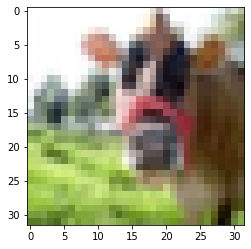

In [ ]:
plt.imshow(X_train[0],cmap="gray")

In [ ]:
from tensorflow.keras.applications.efficientnet import EfficientNetB0 
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, Dropout


input_tensor = Input(shape=(128, 128, 3))  # tamaño imagenes de entrada 128 minimo

# create the base pre-trained model
base_model = EfficientNetB0(input_tensor=input_tensor,weights='imagenet', include_top=False)

16719872/16705208 [==============================] - 0s 0us/step


In [ ]:
# Cogemos la salida y añadimos 3 capas 
x = base_model.output
# Pooling
x = GlobalAveragePooling2D()(x)
# Fully-connected
#x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
# Regresión logística con 100 salidas
predictions = Dense(100, activation='softmax')(x)

# Modelo nuevo
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 128, 128, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 128, 128, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 129, 129, 3)  0           ['normalization[0][0]']      

In [ ]:
optimizer = tf.keras.optimizers.Adam(lr=0.0001)

#early stopping to monitor the validation loss and avoid overfitting
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)

#reducing learning rate on plateau
rlrop = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', mode='min', patience= 5, factor= 0.5, min_lr= 1e-6, verbose=1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# Compilamos
model.compile(optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy', 'mse'])

In [ ]:
hist = model.fit(X_train2,y_train,steps_per_epoch=200,epochs = 20,validation_split = 0.5, callbacks = [early_stop, rlrop])

Epoch 1/20
200/200 [==============================] - 37s 55ms/step - loss: 4.6580 - accuracy: 0.0167 - mse: 0.0099 - val_loss: 4.6908 - val_accuracy: 0.0120 - val_mse: 0.0099 - lr: 1.0000e-04
Epoch 2/20
200/200 [==============================] - 8s 41ms/step - loss: 4.2969 - accuracy: 0.0701 - mse: 0.0098 - val_loss: 4.5860 - val_accuracy: 0.0120 - val_mse: 0.0099 - lr: 1.0000e-04
Epoch 3/20
200/200 [==============================] - 8s 40ms/step - loss: 4.0940 - accuracy: 0.1052 - mse: 0.0097 - val_loss: 4.4429 - val_accuracy: 0.0560 - val_mse: 0.0099 - lr: 1.0000e-04
Epoch 4/20
200/200 [==============================] - 8s 40ms/step - loss: 3.8189 - accuracy: 0.1753 - mse: 0.0096 - val_loss: 4.3315 - val_accuracy: 0.0860 - val_mse: 0.0098 - lr: 1.0000e-04
Epoch 5/20
200/200 [==============================] - 8s 39ms/step - loss: 3.5590 - accuracy: 0.2454 - mse: 0.0093 - val_loss: 4.2237 - val_accuracy: 0.0980 - val_mse: 0.0098 - lr: 1.0000e-04
Epoch 6/20
200/200 [===================

In [ ]:
from tabulate import tabulate

d = [ [1, 1.0851, 3.4299, 6.2118, 0.8974, 0.2200, 0.3800, 4177671]]

print(tabulate(d, headers=["Modelo", 
                           "loss entrenamiento", "loss validación", "loss test", 
                           "accuracy entrenamiento", "accuracy validación", "accuracy test", 
                           "número de prámetros"]))

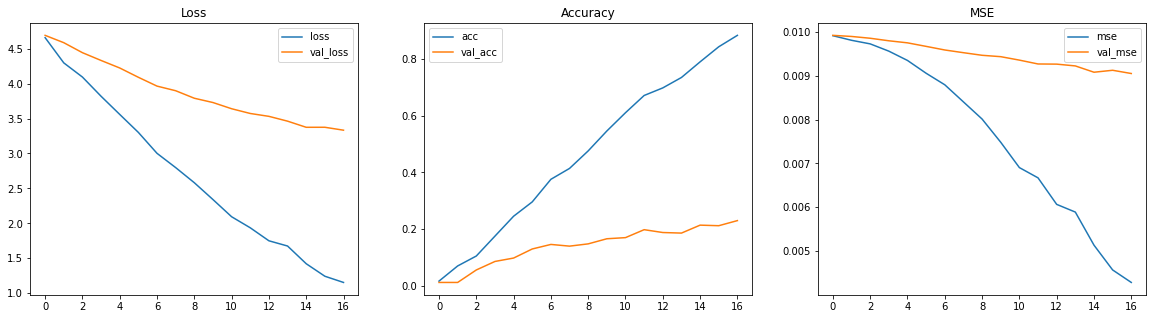

In [ ]:
# Ploteamos la evolucion del loss durante el entrenamiento
import matplotlib.pyplot as plt

%matplotlib inline

figure, axis = plt.subplots(1,3, figsize = (20,5))
axis[0].plot(hist.history['loss'],label="loss")
axis[0].set_title('Loss')
axis[0].plot(hist.history['val_loss'],label="val_loss")
axis[0].legend()

axis[1].plot(hist.history['accuracy'],label="acc")
axis[1].set_title('Accuracy')
axis[1].plot(hist.history['val_accuracy'],label="val_acc")
axis[1].legend()

axis[2].plot(hist.history['mse'],label="mse")
axis[2].set_title('MSE')
axis[2].plot(hist.history['val_mse'],label="val_mse")
axis[2].legend()

plt.show()